# Import necessary libs & prepare dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("boston_dataset.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)

df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8,307,17.4,21.7
1,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,18.3
2,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,25.0
3,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,13.4
4,2.31390,0.0,19.58,0,0.605,5.880,97.3,2.3887,5,403,14.7,19.1


In [3]:
print(df.shape)

(50, 12)


##### Column features
• CRIM per capita crime rate by town <br>
• ZN proportion of residential land zoned for lots over 25,000 sq.ft. <br>
• INDUS proportion of non-retail business acres per town <br>
• CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
• NOX nitric oxides concentration (parts per 10 million) <br>
• RM average number of rooms per dwelling <br>
• AGE proportion of owner-occupied units built prior to 1940 <br>
• DIS weighted distances to five Boston employment centres <br>
• RAD index of accessibility to radial highways <br>
• TAX full-value property-tax rate per 10,000 dollars <br>
• PTRATIO pupil-teacher ratio by town <br>
• MEDV Median value of owner-occupied homes in $1000's <br>


In [4]:
features = df.drop(['MEDV',], axis=1)
target = df['MEDV']

#convert to numpy
X_original = features.to_numpy()
Y_original = target.to_numpy()

print(X_original.shape)
print(Y_original.shape)

(50, 11)
(50,)


## Normalize the dataset

In [5]:
# Normalize the data 

def normalize_data(original_data):
    data_min = np.min(original_data, axis=0)
    data_max = np.max(original_data, axis=0)
    data_range = data_max - data_min
    data_normalized =  (original_data - data_min) / data_range
    
    return data_normalized

In [6]:
X_normalized= normalize_data(X_original)
y_normalized= normalize_data(Y_original)

# Main Multiple Linear Regression algorythm

In [7]:
def transpose_and_add_bias(feature_data):
    #transpose the data
    transposed_data= feature_data.T
    #add bias term
    transposed_data_with_bias = np.vstack((transposed_data, np.ones(transposed_data.shape[1])))
    
    return transposed_data_with_bias

In [8]:
def decorrelate_features(feature_data):

    # Make copy of input matrix
    x_temp = feature_data.copy()
    
    # Get number of features
    feature_rows = feature_data.shape[0]
    
    # Decorrelate features
    for i in range(feature_rows):
        feature_squared = np.sum(x_temp[i]**2)
        for j in range(i+1, feature_rows):
            feature_cross_prod = np.sum(x_temp[i] * x_temp[j])
            if feature_squared == 0:
                print('Warning, division by zero encountered and handled')
                feature_squared = 1e-8 
            feature_grad = feature_cross_prod / feature_squared
            x_temp[j] -= feature_grad * x_temp[i]
            
    decorelated_x_vals = x_temp

    return decorelated_x_vals


In [9]:
def calculate_gradients(decorelated_x_vals, y_values, original_x_features):
  
    # Initialize gradients array
    feature_rows = decorelated_x_vals.shape[0]
    gradients = np.zeros(feature_rows)

    # Calculate gradients
    for i in range(feature_rows-1, -1, -1):
        prod = np.sum(y_values * decorelated_x_vals[i])
        squared = np.sum(decorelated_x_vals[i] * decorelated_x_vals[i])
        if squared == 0:
            print('Warning, division by zero encountered and handled')
            squared = 1e-8

        gradients[i] = prod / squared
        y_values -= gradients[i] * original_x_features[i]
    

    return gradients

In [10]:
X_normalized_transposed_with_bias = transpose_and_add_bias(X_normalized)

print("Training data shapes:")
print("X_normalized:", X_normalized_transposed_with_bias.shape)
print("y_normalized:", y_normalized.shape)

Training data shapes:
X_normalized: (12, 50)
y_normalized: (50,)


In [11]:
decorrelate_X_features = decorrelate_features(X_normalized_transposed_with_bias)

In [12]:
decorrelate_X_features = decorrelate_features(X_normalized_transposed_with_bias)

In [13]:
gradient_values = calculate_gradients(decorrelate_X_features, y_normalized, X_normalized_transposed_with_bias )

In [14]:
real_gradient_values_reversed = np.flip(gradient_values)
real_gradient_values_reversed

array([ 0.43365324, -0.18175555, -0.42523263,  0.13711559, -0.19621044,
       -0.06995875,  0.62886834, -0.08972977, -0.0081258 ,  0.00121573,
        0.0482544 ,  0.13295955])

In [15]:
gradient_values

array([ 0.13295955,  0.0482544 ,  0.00121573, -0.0081258 , -0.08972977,
        0.62886834, -0.06995875, -0.19621044,  0.13711559, -0.42523263,
       -0.18175555,  0.43365324])

# Reconstructing the y labels using the calculated gradients and X feature data

In [16]:
def denormalize_data(original_data,normalized_data):
    
    data_min = np.min(original_data)
    data_max = np.max(original_data)
    data_range = data_max - data_min
    
    denormalize_data = ( normalized_data * data_range) + data_min
    return denormalize_data

R^2 score (denormalized): 0.8497719822024984


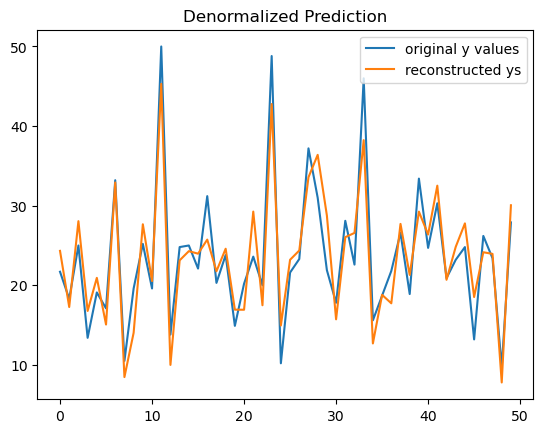

In [17]:
y_pred_norm = gradient_values @ X_normalized_transposed_with_bias #prediction#

reconstructed_y = denormalize_data(Y_original,y_pred_norm)

# Plot the denormalized y values
plt.figure(2)
plt.title("Denormalized Prediction")
plt.plot(Y_original)
plt.plot(reconstructed_y)
plt.legend(["original y values", "reconstructed ys"])

# Calculate R^2 score for denormalized prediction
accuracy_denormalized = r2_score(Y_original, reconstructed_y)
print("R^2 score (denormalized):", accuracy_denormalized)

# Estimating value of a new property

In [18]:
# 63.61759948730469  --->0.3379058837890625      #6.1999969482421875, 1, 0.506988525390625
X_original[0]  #0.015472412109375 0.4076995849609375

array([  0.40771,   0.     ,   6.2    ,   1.     ,   0.507  ,   6.164  ,
        91.3    ,   3.048  ,   8.     , 307.     ,  17.4    ])

In [19]:
# user_input_feature_values = np.array([9.0771e-01, 5.0000e-01, 1.9500e+01, 1.3200e+00, 9.9000e-01,
#        1.2164e+01, 9.1300e+01, 1.1000e+00, 6.0000e+00, 5.0600e+02,
#        2.1000e+01])

user_input_feature_values = X_original[0]

X_min = np.min(X_original, axis=0)
X_max = np.max(X_original, axis=0)
X_range = X_max - X_min
# normalize the feature vals
normalized_vals = (user_input_feature_values - X_min) / X_range
# add bias term 
user_input_feature_values_normalized_with_bias = np.append(normalized_vals, 1)

# get normalized prediction
prediction_normalized = gradient_values @ user_input_feature_values_normalized_with_bias
print(prediction_normalized)

0.3628772191870112


In [20]:
#denormalize forecast
Y_min = np.min(Y_original, axis=0)
Y_max = np.max(Y_original, axis=0)
Y_range = Y_max - Y_min
# rescale prediction
denormlized_house_value_estimation =  (prediction_normalized * Y_range) + Y_min
denormlized_house_value_estimation

24.32395193323655

# Transition to Cairo
## Create a scarb project

Scarb is the Cairo package manager specifically created to streamline our Cairo and Starknet development process. You can find all information about Scarb and Cairo installation here

In [ ]:
! scarb new multiple_linear_regression

In [ ]:
! echo -n > multiple_linear_regression/src/lib.cairo

A new project folder will be created for you and make sure to replace the content in Scarb.toml file with the following code:
```toml
[package]
name = "multiple_linear_regresion"
version = "0.1.0"


[dependencies]
orion = { git = "https://github.com/gizatechxyz/onnx-cairo" }

[scripts]
test = "scarb cairo-test -f multiple_linear_regression_test"
```

In [ ]:
# add reference modules to help our code compile at the end
%%writefile -a multiple_linear_regression/src/lib.cairo
mod test;
mod data_preprocessing;
mod helper_functions;
mod datasets;
mod model;

## Generate Cairo files


In [ ]:
# Convert the original data to Cairo 


def generate_cairo_files(data, name, folder_name):
    
    os.makedirs(f'multiple_linear_regression/src/datasets/{folder_name}', exist_ok=True)
    with open(os.path.join('multiple_linear_regression/src/datasets', f'{folder_name}', f"{name}.cairo"), "w") as f:
            f.write(
                "use array::ArrayTrait;\n" +
                "use orion::numbers::fixed_point::implementations::fp16x16::core::{FP16x16Impl, FP16x16PartialEq };\n" +
                "use orion::operators::tensor::{Tensor, TensorTrait, FP16x16Tensor};\n" +
                "use orion::numbers::{FP16x16, FixedTrait};\n\n" +
                "fn {0}() ->  Tensor<FP16x16>  ".format(name) + "{\n" +
                "    let tensor = TensorTrait::<FP16x16>::new( \n"
            )
            
            if len(data.shape)>1:
                f.write("    shape: array![{0},".format(data.shape[0]))
                f.write("{0}].span(),\n".format(data.shape[1]))
                f.write(
                    "    data: array![ \n"
                )
            if len(data.shape)==1:
                f.write("    shape: array![{0}].span(),\n".format(data.shape[0]))
                f.write(
                    "    data: array![ \n"
                )
            for val in np.nditer(data.flatten()):
                f.write("    FixedTrait::new({0}, {1} ),\n".format(abs(int(val * 2**16)), str(val < 0).lower()))
            f.write(
                "].span() \n \n" +
                ");\n\n"+
                "return tensor; \n"+
                "}"
            )
    with open(os.path.join('multiple_linear_regression/src/datasets', f'{folder_name}.cairo'), 'a') as f:
        f.write(f"mod {name};\n")

In [ ]:
generate_cairo_files(X_original, 'boston_x_features', 'boston_data')
generate_cairo_files(Y_original, 'boston_y_labels', 'boston_data') 

In [ ]:
generate_cairo_files(user_input_feature_values, 'user_inputs_boston_data', 'user_inputs_data')

In [ ]:
# add reference modules to help our code compile
! touch multiple_linear_regression/src/datasets.cairo

In [ ]:
%%writefile multiple_linear_regression/src/datasets.cairo
mod boston_data;
mod user_inputs_data;

In [ ]:
! touch multiple_linear_regression/src/datasets/boston_data.cairo

In [ ]:
%%writefile multiple_linear_regression/src/datasets/boston_data.cairo
mod boston_x_features;
mod boston_y_labels;

In [ ]:
! touch multiple_linear_regression/src/datasets/user_inputs_data.cairo

In [ ]:
%%writefile multiple_linear_regression/src/datasets/user_inputs_data.cairo
mod user_inputs_boston_data;

## Helper functions 

We add some helper functions to make it easier to construct our MLR model

In [ ]:
! touch multiple_linear_regression/src/helper_functions.cairo

In [ ]:
%%writefile multiple_linear_regression/src/helper_functions.cairo

use debug::PrintTrait;
use array::{ArrayTrait, SpanTrait};
use orion::operators::tensor::{
    Tensor, TensorTrait, FP16x16Tensor, U32Tensor, U32TensorAdd, 
    FP16x16TensorSub, FP16x16TensorAdd, FP16x16TensorDiv, FP16x16TensorMul};

use orion::numbers::{FP16x16,  FixedTrait};



// retrieves row data by index in a 2D tensor
fn get_tensor_data_by_row(tensor_data: Tensor<FP16x16>, row_index: u32, ) -> Tensor<FP16x16> {
    let tensor_shape = tensor_data.shape;
    let tensor_column_len= *tensor_shape.at(0);
    let tensor_row_len= *tensor_shape.at(1); //13
    // crete new array
    let mut result = ArrayTrait::<FP16x16>::new();
    // loop through the x values and append values 
    let mut i:u32 = 0;
    loop {
        if i >= tensor_row_len  {
            break();
        }
        result.append(tensor_data.at(indices: array![row_index,i].span()));
        i += 1;
        };
    let resultant_tensor = TensorTrait::<FP16x16>::new(array![tensor_row_len].span(), data: result.span());
    return resultant_tensor;
}


// transposes tensor
fn transpose_tensor(tensor_data: Tensor<FP16x16>) -> Tensor<FP16x16>{
    let tensor_transposed = tensor_data.transpose(axes: array![1, 0].span());
    return tensor_transposed;
}

fn calculate_mean(tensor_data: Tensor<FP16x16>) -> FP16x16 {
    let tensor_size = FixedTrait::<FP16x16>::new_unscaled(tensor_data.data.len(), false);
    let cumulated_sum = tensor_data.cumsum(0, Option::None(()), Option::None(()));
    let sum_result = cumulated_sum.data[tensor_data.data.len() - 1];
    let mean = *sum_result / tensor_size;
    return mean;
}

// Calculates the R-Squared score between two tensors.
fn calculate_r_score(Y_values: Tensor<FP16x16>, Y_pred_values: Tensor<FP16x16>) -> FP16x16 {
    let mean_y_value = calculate_mean(Y_values);
    // creating the appropriate tensor shapes and empty arrays to populate values into
    let mut squared_diff_shape = array::ArrayTrait::new();
    squared_diff_shape.append(Y_values.data.len());
    let mut squared_diff_vals = array::ArrayTrait::new();
    let mut squared_mean_diff_shape = array::ArrayTrait::new();
    squared_mean_diff_shape.append(Y_values.data.len());
    let mut squared_mean_diff_vals = array::ArrayTrait::new();

    let mut i: u32 = 0;
    loop {
        if i >= Y_values.data.len() {
            break ();
        }
        let diff_pred = *Y_values.data.at(i) - *Y_pred_values.data.at(i);
        let squared_diff = diff_pred * diff_pred;
        squared_diff_vals.append(squared_diff);

        let diff_mean = *Y_values.data.at(i) - mean_y_value;
        let squared_mean_diff = diff_mean * diff_mean;
        squared_mean_diff_vals.append(squared_mean_diff);
        i += 1;
    };
    let squared_diff_tensor = TensorTrait::<FP16x16>::new(
        squared_diff_shape.span(), squared_diff_vals.span()
    );
    let squared_mean_diff_tensor = TensorTrait::<FP16x16>::new(
        squared_mean_diff_shape.span(), squared_mean_diff_vals.span()
    );
    let sum_squared_diff = squared_diff_tensor.cumsum(0, Option::None(()), Option::None(()));
    let sum_squared_mean_diff = squared_mean_diff_tensor.cumsum(0, Option::None(()), Option::None(()));
    let r_score = FixedTrait::new_unscaled(1, false)
        - *sum_squared_diff.data.at(Y_values.data.len() - 1)
            / *sum_squared_mean_diff.data.at(Y_values.data.len() - 1);

    return r_score;
}



// computes the x_min, x_max and x_range. Used for helping in normalizing and denormalizing user inputed values operations
fn normalize_user_x_inputs(x_inputs:Tensor<FP16x16>, original_x_values: Tensor<FP16x16>) -> Tensor<FP16x16> {
    let mut x_inputs_normalized =   TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![FixedTrait::new(10, false)].span());

    let mut x_min= ArrayTrait::<FP16x16>::new();
    let mut x_max= ArrayTrait::<FP16x16>::new();
    let mut x_range= ArrayTrait::<FP16x16>::new();
    let mut result= ArrayTrait::<FP16x16>::new();

    if original_x_values.shape.len()>1{ 

    let transposed_tensor =  original_x_values.transpose(axes: array![1, 0].span());
    let data_len= *transposed_tensor.shape.at(0); //13
    // loop through each row calculating the min, max and range row values for each feature columns
    let mut i :u32  = 0;
    loop{
        if i >= data_len {
            break();
        }
        let mut transposed_tensor_row = get_tensor_data_by_row(transposed_tensor, i);
        x_min.append(transposed_tensor_row.min_in_tensor());
        x_max.append(transposed_tensor_row.max_in_tensor());
        x_range.append(transposed_tensor_row.max_in_tensor() - transposed_tensor_row.min_in_tensor());
        i+=1;
    };
    let mut x_min_tensor= TensorTrait::new(shape: array![data_len].span(), data: x_min.span());
    let mut x_max_tensor= TensorTrait::new(shape: array![data_len].span(), data: x_max.span());
    let mut x_range_tensor= TensorTrait::new(shape: array![data_len].span(), data: x_range.span());

    // for normalizing 2D user inputed feature vals
    if x_inputs.shape.len()>1{ 
    let mut j:u32 = 0;
    loop{
        if j >= *x_inputs.shape.at(0) {
            break();
        };
        let mut row_data = get_tensor_data_by_row(x_inputs, j);
        let mut norm_row_data = (row_data - x_min_tensor) / x_range_tensor;
        let mut k:u32 =0;
        loop{

            if k >= norm_row_data.data.len() {
            break();
        };
         result.append(*norm_row_data.data.at(k));
        k+=1;
        };
    j+=1;
    };
    x_inputs_normalized = TensorTrait::<FP16x16>::new(array![*x_inputs.shape.at(0), *x_inputs.shape.at(1)].span(), data: result.span());
    
     };

    // for normalizing 1D feature input
    if x_inputs.shape.len()==1{
    x_inputs_normalized = (x_inputs - x_min_tensor) / x_range_tensor;
    };

    }

    if original_x_values.shape.len()==1{
        let mut  x_min_tensor = TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![original_x_values.min_in_tensor()].span());
        let mut x_max_tensor = TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![original_x_values.max_in_tensor()].span());
        let mut x_range_tensor = TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![original_x_values.max_in_tensor() - original_x_values.min_in_tensor()].span());
        let mut  diff = ((x_inputs - x_min_tensor));
    x_inputs_normalized = ((x_inputs - x_min_tensor)) / x_range_tensor;
    };
    return x_inputs_normalized;
}



// rescales model predictions to standard format
fn rescale_predictions(prediction_result:Tensor<FP16x16>, y_values: Tensor<FP16x16>) -> Tensor<FP16x16> {

    let mut rescale_predictions =   TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![FixedTrait::new(10, false)].span());

   let mut y_min_array= ArrayTrait::<FP16x16>::new();
    let mut y_max_array= ArrayTrait::<FP16x16>::new();
    let mut y_range_array= ArrayTrait::<FP16x16>::new();

    let mut y_max = y_values.max_in_tensor();
    let mut y_min = y_values.min_in_tensor();
    let mut y_range = y_values.max_in_tensor() - y_values.min_in_tensor();
    // convert to tensor format for ease of math operations
    let y_min_tensor = TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![ y_min].span());
    let y_max_tensor = TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![ y_max].span());
    let y_range_tensor = TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![y_range].span());

   
    rescale_predictions = (prediction_result * y_range_tensor)+ y_min_tensor;
    
   
    return rescale_predictions;
}



## Data-preprocessing functions

It is <b>recommended</b> to normalize data before passing it to the multiple linear regression model since we will be working with 16x16 fixed point numbers in cairo. This will prevent from having overflow issues as we compute the feature gradient values (some of the calculations involve squaring x values which can be relatively large if not normalized)

In [ ]:
! touch multiple_linear_regression/src/data_preprocessing.cairo

In [ ]:

%%writefile multiple_linear_regression/src/data_preprocessing.cairo

use orion::operators::tensor::{
    Tensor, TensorTrait, FP16x16Tensor, U32Tensor, U32TensorAdd, 
    FP16x16TensorSub, FP16x16TensorAdd, FP16x16TensorDiv, FP16x16TensorMul};
use orion::numbers::{FP16x16,  FixedTrait};
use multiple_linear_regresion::helper_functions::{get_tensor_data_by_row, transpose_tensor, calculate_mean , 
calculate_r_score, normalize_user_x_inputs, rescale_predictions};

#[derive(Copy, Drop)]
struct Dataset{
    x_values: Tensor<FP16x16>,
    y_values: Tensor<FP16x16>,
}

#[generate_trait]
impl DataPreprocessing of DatasetTrait {
    fn normalize_dataset(ref self:Dataset) -> Dataset{

      let mut x_values = TensorTrait::<FP16x16>::new(array![1].span(),array![FixedTrait::new(0, false)].span());
      let mut y_values = TensorTrait::<FP16x16>::new(array![1].span(),array![FixedTrait::new(0, false)].span());
        // used for multiple_linear_regression_models
        if self.x_values.shape.len()>1{
        x_values = normalize_feature_data(self.x_values);
        y_values = normalize_label_data(self.y_values);
         }
        // used for linear_regression_models
        if self.x_values.shape.len()==1{
        x_values = normalize_label_data(self.x_values);
        y_values = normalize_label_data(self.y_values);
         }

        return Dataset{x_values, y_values};
    }

    


}

// normalizes 2D Tensor
fn normalize_feature_data(tensor_data: Tensor<FP16x16>) -> Tensor<FP16x16> {
    let mut x_min_array = ArrayTrait::<FP16x16>::new();
    let mut x_max_array = ArrayTrait::<FP16x16>::new();
    let mut x_range_array = ArrayTrait::<FP16x16>::new();
    let mut normalized_array = ArrayTrait::<FP16x16>::new();
    // transpose to change rows to be columns
    let transposed_tensor =  tensor_data.transpose(axes: array![1, 0].span());
    let tensor_shape = transposed_tensor.shape;
    let tensor_row_len= *tensor_shape.at(0); // 13 
    let tensor_column_len= *tensor_shape.at(1); //50
    // loop and append max and min row values to corresponding  array
    let mut i :u32  = 0;
    loop{
        if i >= tensor_row_len {
            break();
        }
        let mut transposed_tensor_row = get_tensor_data_by_row(transposed_tensor, i);
        x_max_array.append(transposed_tensor_row.max_in_tensor());
        x_min_array.append(transposed_tensor_row.min_in_tensor());
        x_range_array.append(transposed_tensor_row.max_in_tensor() - transposed_tensor_row.min_in_tensor());
        i+=1;
    };
    // convert array to tensor format for ease of math operation
    let mut x_min = TensorTrait::<FP16x16>::new(shape: array![1,tensor_row_len].span(), data: x_min_array.span());
    let mut x_range = TensorTrait::<FP16x16>::new(shape: array![1,tensor_row_len].span(), data: x_range_array.span());
    let normalized_tensor  = (tensor_data  - x_min) / x_range;
    return normalized_tensor;
}

// normalizes 1D tensor
fn normalize_label_data(tensor_data: Tensor<FP16x16>) -> Tensor<FP16x16> {
    let mut normalized_array = ArrayTrait::<FP16x16>::new();
    let mut range = tensor_data.max_in_tensor() - tensor_data.min_in_tensor();
    // loop through tensor values normalizing and appending to new array
    let mut i :u32  = 0;
    loop{
        if i >= tensor_data.data.len() {
            break();
        }
        let mut diff = tensor_data.at(indices: array![i].span()) - tensor_data.min_in_tensor();
        normalized_array.append(diff / range );
        i+=1;
    };
    // convert normalized array values to tensor format
    let mut normalized_tensor = TensorTrait::<FP16x16>::new(shape: array![tensor_data.data.len()].span(), data: normalized_array.span());
    return normalized_tensor;
}



## Multiple Linear Regression Model

Implement the Multiple Linear Regression functions

In [ ]:
os.makedirs(f'multiple_linear_regression/src/model/', exist_ok=True)

In [ ]:
! touch multiple_linear_regression/src/model/multiple_linear_regression_model.cairo

In [ ]:
%%writefile multiple_linear_regression/src/model/multiple_linear_regression_model.cairo

use orion::operators::tensor::{
    Tensor, TensorTrait, FP16x16Tensor, U32Tensor, U32TensorAdd, 
    FP16x16TensorSub, FP16x16TensorAdd, FP16x16TensorDiv, FP16x16TensorMul};
use orion::numbers::{FP16x16,  FixedTrait};
use multiple_linear_regresion::data_preprocessing::{Dataset, DatasetTrait};
use multiple_linear_regresion::helper_functions::{get_tensor_data_by_row, transpose_tensor, calculate_mean , 
calculate_r_score, normalize_user_x_inputs, rescale_predictions};


#[derive(Copy, Drop)]
struct MultipleLinearRegressionModel {
    coefficients: Tensor<FP16x16>

}

#[generate_trait]
impl RegressionOperation of MultipleLinearRegressionModelTrait {

    // reconstruct the y values using the computed gradients and x values
fn predict (ref self:MultipleLinearRegressionModel, feature_inputs:Tensor<FP16x16>) ->Tensor<FP16x16> {
        // random tensor value that we will replace
        let mut prediction_result =   TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![FixedTrait::new(10, false)].span());
        
        let mut result = ArrayTrait::<FP16x16>::new();
        // for multiple predictions
        if feature_inputs.shape.len()>1{
            let feature_values = add_bias_term(feature_inputs, 1);
            let mut data_len:u32 = *feature_values.shape.at(0);        
            let mut i:u32 = 0;
            loop{
            if i>=data_len{   
                break();
            }
            let feature_row_values = get_tensor_data_by_row(feature_values, i);
            let predicted_values = feature_row_values.matmul(@self.coefficients); 
            result.append(*predicted_values.data.at(0));
            i+=1;
            };
            prediction_result =  TensorTrait::<FP16x16>::new(shape: array![ result.len()].span(), data: result.span());
        }

        // for single predictions 
        if feature_inputs.shape.len()==1 && self.coefficients.data.len()>1 {
            let feature_values = add_bias_term(feature_inputs, 1);
            prediction_result = feature_values.matmul(@self.coefficients); 
        }
       
    return prediction_result;
}

}

fn MultipleLinearRegression(dataset: Dataset) -> MultipleLinearRegressionModel {
    let x_values_tranposed = transpose_tensor(dataset.x_values);
    let x_values_tranposed_with_bias= add_bias_term(x_values_tranposed,0);
    let decorrelated_x_features = decorrelate_x_features(x_values_tranposed_with_bias);
    let coefficients = compute_gradients( decorrelated_x_features, dataset.y_values, x_values_tranposed_with_bias);
 return MultipleLinearRegressionModel { coefficients};
}

//Adds bias term to features based on axis
fn add_bias_term(x_feature: Tensor<FP16x16>, axis:u32) -> Tensor<FP16x16>{
    let mut tensor_with_bias =   TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![FixedTrait::new(10, false)].span());
    let mut result = ArrayTrait::<FP16x16>::new();
    // check if feature data has multiple rows and columns
    if x_feature.shape.len()>1 {
        let mut index:u32=0;
        if axis==1{
            index=0;
        }
        else{
            index=1;
        }
        let data_len= *x_feature.shape.at(index);  // 50
        let mut i:u32 = 0;
        loop{
            if i >=data_len{
                break();
            }
            result.append(FixedTrait::new(65536, false )); //65536=ONE in FP16x16, change accordingly  
            i+=1;
        };
        if axis == 0{
        let res_tensor = TensorTrait::new(shape: array![1,data_len].span(), data: result.span());
        tensor_with_bias = TensorTrait::concat(tensors: array![x_feature, res_tensor].span(), axis: axis);}
        else{
        let res_tensor = TensorTrait::new(shape: array![data_len,1].span(), data: result.span());
        tensor_with_bias = TensorTrait::concat(tensors: array![x_feature, res_tensor].span(), axis: axis);}
        }
    // check if feature data is 1D
    if x_feature.shape.len()==1{
        let mut j:u32 = 0;
        loop{
            if j>= x_feature.data.len() {
                break();
            }
            result.append(*x_feature.data.at(j));
            j+=1; 
        };
        result.append(FixedTrait::new(65536, false )); //65536=ONE in FP16x16, change accordingly  
        tensor_with_bias =  TensorTrait::<FP16x16>::new(shape: array![result.len()].span(), data: result.span());
        }
    return tensor_with_bias;
}

// decorrelates the feature data (*only the last tensor row of the decorelated feature data will be fully orthogonal)
fn decorrelate_x_features(x_feature_data: Tensor<FP16x16>) -> Tensor<FP16x16> {
    let mut input_tensor =  x_feature_data;

    let mut i:u32 = 0;
    loop {
        if i >= *x_feature_data.shape.at(0) {
            break();
        }
        let mut placeholder = ArrayTrait::<FP16x16>::new();
        let mut feature_row_values  = get_tensor_data_by_row(input_tensor, i); 
        let mut feature_squared = feature_row_values.matmul(@feature_row_values);
        // avoiding division by zero errors
        if *feature_squared.data.at(0) == FixedTrait::new(0, false) {
            feature_squared = TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![FixedTrait::new(10, false)].span());
        }
        // loop throgh remaining tensor data and remove the individual tensor factors from one another 
        let mut j:u32 = i+ 1;
        loop {
            if j >= *x_feature_data.shape.at(0)  {
                break();
            }
            let mut remaining_tensor_values = get_tensor_data_by_row(input_tensor, j); 
            let feature_cross_product = feature_row_values.matmul(@remaining_tensor_values); 
            let feature_gradients = feature_cross_product / feature_squared; 
            remaining_tensor_values = remaining_tensor_values - (feature_row_values * feature_gradients);  //remove the feature factors from one another
            // loop and append the modifieed remaining_tensor_values (after the corelated factor has been removed) to placeholder array
            let mut k:u32 = 0;
            loop {
            if k >=  remaining_tensor_values.data.len() {
                break();
            }
            placeholder.append(*remaining_tensor_values.data.at(k));
            k+= 1;
            };

            j += 1;
            };
            // convert placeholder array to tensor format and update the original tensor with the new modified decorrelated tensor row values
            let mut decorrelated_tensor = TensorTrait::new(shape: array![*x_feature_data.shape.at(0)-1-i, *x_feature_data.shape.at(1)].span(), data: placeholder.span());
            let mut original_tensor = input_tensor.slice(starts: array![0, 0].span(), ends: array![i+1, *x_feature_data.shape.at(1)].span(), axes: Option::None(()), steps: Option::Some(array![1, 1].span()));
            input_tensor = TensorTrait::concat(tensors: array![original_tensor, decorrelated_tensor].span(), axis: 0);
            i +=1;
        };
        return input_tensor;
}

// computes the corresponding MLR gradient using decorrelated feature
fn compute_gradients( decorrelated_x_features: Tensor<FP16x16>, y_values: Tensor<FP16x16>, original_x_tensor_values: Tensor<FP16x16>) -> Tensor<FP16x16> {
    let mut gradient_values_flipped =   TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![FixedTrait::new(10, false)].span());

    let mut result = ArrayTrait::<FP16x16>::new();
    let mut tensor_y_vals =  y_values;
    let mut i:u32 = *decorrelated_x_features.shape.at(0);
    // loop through Decorrelated_x_features starting from the fully orthogonlised last tensor row value
    loop {
        if i <= 0 {
            break();
        }
        let index_val = i-1;
        let mut decorelated_feature_row_values = get_tensor_data_by_row(decorrelated_x_features, index_val); // 50 vals
        let mut decorelated_features_squared = decorelated_feature_row_values.matmul(@decorelated_feature_row_values);
        let mut feature_label_cross_product = tensor_y_vals.matmul(@decorelated_feature_row_values); // multiply the tensors
        // avoiding division by zero errors
        if *decorelated_features_squared.data.at(0) == FixedTrait::new(0, false) {
            decorelated_features_squared = TensorTrait::<FP16x16>::new(shape: array![1].span(), data: array![FixedTrait::new(10, false)].span());
        }
        // computing the feature gradient values using the y values and decorrelated x features and appending to array
        let mut single_gradient_value = feature_label_cross_product / decorelated_features_squared; // devide the summed value by each other
        result.append(*single_gradient_value.data.at(0));
        // remove the assosciated feature gradient value away from y values
        let mut original_x_tensor_row_values = get_tensor_data_by_row(original_x_tensor_values, index_val);
        tensor_y_vals = tensor_y_vals -(original_x_tensor_row_values * single_gradient_value);  //remove the first feature from second feature values
        i -=1;
        };
    // convert the gradient array to tensor format
    let final_gradients = TensorTrait::new(shape: array![*decorrelated_x_features.shape.at(0)].span(), data: result.span());

    let mut reverse_grad_array = ArrayTrait::<FP16x16>::new();
    let mut data_len:u32 = final_gradients.data.len();
    loop{
        if data_len<=0 {
            break();
        }
        let temp_val = data_len-1;
        reverse_grad_array.append(*final_gradients.data.at(temp_val));
        data_len-=1; 
    };
    // convert gradient values to tensor format
    let gradient_values_flipped =  TensorTrait::<FP16x16>::new(shape: array![reverse_grad_array.len()].span(), data: reverse_grad_array.span());
        
    return gradient_values_flipped;
}





 

In [ ]:
! touch multiple_linear_regression/src/model.cairo

In [ ]:
%%writefile multiple_linear_regression/src/model.cairo
mod multiple_linear_regression_model;

## Running tests on model

Running some checks to ensure the model is performing as expected. Some of the checks involve:
- data normalizations checks
- tensor shape/dimension check
- coefficient value and dimension checks  
- model accuracy deviance checks

In [ ]:
! touch multiple_linear_regression/src/test.cairo

In [ ]:
%%writefile multiple_linear_regression/src/test.cairo

// use traits::Into;
use debug::PrintTrait;
use array::{ArrayTrait, SpanTrait};


use multiple_linear_regresion::datasets::boston_data::boston_x_features::boston_x_features;
use multiple_linear_regresion::datasets::boston_data::boston_y_labels::boston_y_labels;
use multiple_linear_regresion::datasets::user_inputs_data::user_inputs_boston_data::user_inputs_boston_data;

use orion::numbers::{FP16x16,  FixedTrait};

use multiple_linear_regresion::model::multiple_linear_regression_model::{
     MultipleLinearRegressionModel, MultipleLinearRegression, MultipleLinearRegressionModelTrait
};
use multiple_linear_regresion::data_preprocessing::{Dataset, DatasetTrait};
use multiple_linear_regresion::helper_functions::{get_tensor_data_by_row, transpose_tensor, calculate_mean , 
calculate_r_score, normalize_user_x_inputs, rescale_predictions};

use orion::operators::tensor::{
    Tensor, TensorTrait, FP16x16Tensor, U32Tensor, U32TensorAdd, 
    FP16x16TensorSub, FP16x16TensorAdd, FP16x16TensorDiv, FP16x16TensorMul};

#[test]
#[available_gas(99999999999999999)]
fn multiple_linear_regression_test() {

// -------------------------------------------------------------------Boston dataset tests---------------------------------------------------------------------------------------------

let mut main_x_vals = boston_x_features();
let mut main_y_vals = boston_y_labels();
let mut dataset = Dataset{x_values: main_x_vals,y_values:main_y_vals};
let mut normalized_dataset = dataset.normalize_dataset();
let mut model  = MultipleLinearRegression(normalized_dataset);
let mut model_coefficients = model.coefficients;
let mut reconstructed_ys = model.predict (normalized_dataset.x_values);
let mut r_squared_score = calculate_r_score(normalized_dataset.y_values,reconstructed_ys);
r_squared_score.print(); 

// checking if data has been normalized correctly
assert(normalized_dataset.x_values.max_in_tensor() <= FixedTrait::new(65536, false), 'normalized x not between 0-1');
assert(normalized_dataset.x_values.min_in_tensor() >= FixedTrait::new(0, false), 'normalized x not between 0-1');
assert(normalized_dataset.y_values.max_in_tensor() <= FixedTrait::new(65536, false), 'normalized y not between 0-1');
assert(normalized_dataset.x_values.min_in_tensor() >= FixedTrait::new(0, false), 'normalized y not between 0-1');
// performing checks on the shape of normalized data
assert(normalized_dataset.x_values.data.len()== main_x_vals.data.len() && 
normalized_dataset.y_values.data.len()== main_y_vals.data.len() , 'normalized data shape mismatch');
// performing checks on shape on coefficient values (gradient vals + bias)
assert(model.coefficients.data.len() == *main_x_vals.shape.at(1)+1, 'coefficient data shape mismatch');
// model accuracy deviance checks
assert(r_squared_score >= FixedTrait::new(55699, false), 'Boston model acc. less than 84%');


// boston user inputed house valuation predictions
let user_input = user_inputs_boston_data();
let mut normalized_user_x_inputs = normalize_user_x_inputs(user_input, main_x_vals) ;
let mut prediction_result  = model.predict (normalized_user_x_inputs); 
let mut rescale_prediction  = rescale_predictions(prediction_result, main_y_vals);
(*rescale_prediction.data.at(0)).print(); 


}

